In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model

pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.cross_validation import train_test_split


In [318]:
#df = pd.read_csv(pd.compat.StringIO(mpg.text), sep='/t', engine='python') 
df = pd.read_csv('mpg_h.csv')

In [319]:
df.head(20)

,mpg,cylinders,displacement,hp,weight,accel,year,make_model
0,18.000,8,307.000,130,3504,12.000,70,"1\t""chevrolet chevelle malibu"""
1,15.000,8,350.000,165,3693,11.500,70,"1\t""buick skylark 320"""
2,18.000,8,318.000,150,3436,11.000,70,"1\t""plymouth satellite"""
3,16.000,8,304.000,150,3433,12.000,70,"1\t""amc rebel sst"""
4,17.000,8,302.000,140,3449,10.500,70,"1\t""ford torino"""
5,15.000,8,429.000,198,4341,10.000,70,"1\t""ford galaxie 500"""
6,14.000,8,454.000,220,4354,9.000,70,"1\t""chevrolet impala"""
7,14.000,8,440.000,215,4312,8.500,70,"1\t""plymouth fury iii"""
8,14.000,8,455.000,225,4425,10.000,70,"1\t""pontiac catalina"""
9,15.000,8,390.000,190,3850,8.500,70,"1\t""amc ambassador dpl"""


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
hp              398 non-null object
weight          398 non-null int64
accel           398 non-null float64
year            398 non-null int64
make_model      398 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [321]:
df.describe()

,mpg,cylinders,displacement,weight,accel,year
count,398.000,398.000,398.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,2970.425,15.568,76.010
std,7.816,1.701,104.270,846.842,2.758,3.698
min,9.000,3.000,68.000,1613.000,8.000,70.000
25%,17.500,4.000,104.250,2223.750,13.825,73.000
50%,23.000,4.000,148.500,2803.500,15.500,76.000
75%,29.000,8.000,262.000,3608.000,17.175,79.000
max,46.600,8.000,455.000,5140.000,24.800,82.000


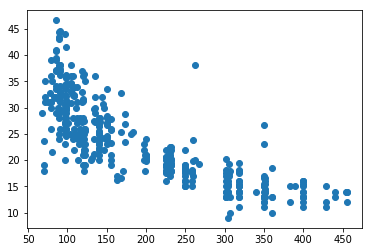

In [322]:
y = df['mpg']
x = df['displacement']

plt.scatter(x, y)

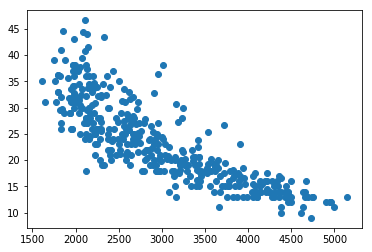

In [323]:
y = df['mpg']
x = df['weight']

plt.scatter(x, y)

In [324]:
df['weight2'] = df['weight']

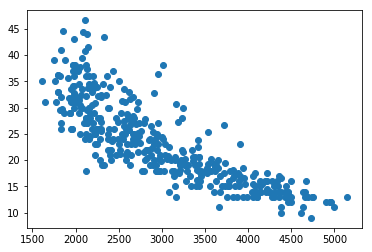

In [325]:
y = df['mpg']
x = df['weight2']

plt.scatter(x, y)

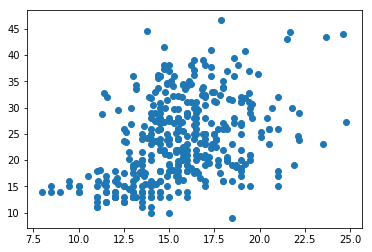

In [326]:
y = df['mpg']
x = df['accel']

plt.scatter(x, y)

In [327]:
df['accellog'] =np.log(df.accel)

In [328]:
df.head()

,mpg,cylinders,displacement,hp,weight,accel,year,make_model,weight2,accellog
0,18.000,8,307.000,130,3504,12.000,70,"1\t""chevrolet chevelle malibu""",3504,2.485
1,15.000,8,350.000,165,3693,11.500,70,"1\t""buick skylark 320""",3693,2.442
2,18.000,8,318.000,150,3436,11.000,70,"1\t""plymouth satellite""",3436,2.398
3,16.000,8,304.000,150,3433,12.000,70,"1\t""amc rebel sst""",3433,2.485
4,17.000,8,302.000,140,3449,10.500,70,"1\t""ford torino""",3449,2.351


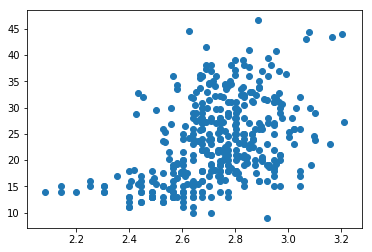

In [329]:
y = df['mpg']
x = df['accellog']

plt.scatter(x, y)

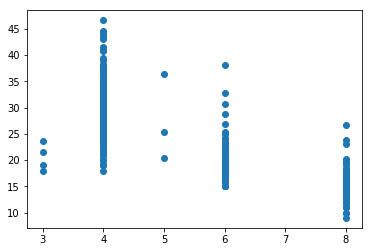

In [330]:
y = df['mpg']
x = df['cylinders']

plt.scatter(x, y)

In [331]:
df.corr()

,mpg,cylinders,displacement,weight,accel,year,weight2,accellog
mpg,1.000,-0.775,-0.804,-0.832,0.420,0.579,-0.832,0.434
cylinders,-0.775,1.000,0.951,0.896,-0.505,-0.349,0.896,-0.533
displacement,-0.804,0.951,1.000,0.933,-0.544,-0.370,0.933,-0.580
weight,-0.832,0.896,0.933,1.000,-0.417,-0.307,1.000,-0.442
accel,0.420,-0.505,-0.544,-0.417,1.000,0.288,-0.417,0.990
year,0.579,-0.349,-0.370,-0.307,0.288,1.000,-0.307,0.311
weight2,-0.832,0.896,0.933,1.000,-0.417,-0.307,1.000,-0.442
accellog,0.434,-0.533,-0.580,-0.442,0.990,0.311,-0.442,1.000


C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D88134B7B8>,
      dtype=object)

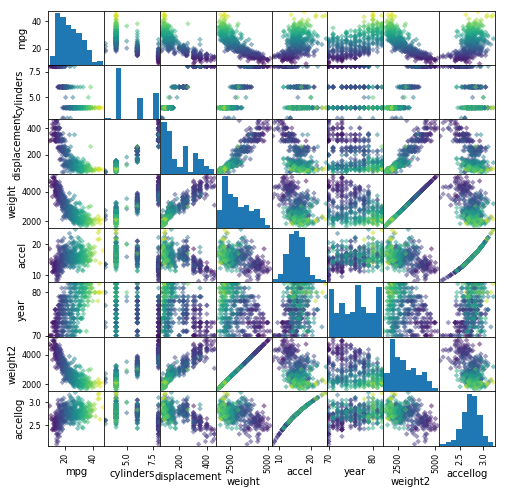

In [332]:
y= df['mpg']
pd.scatter_matrix(df, c=y, figsize=[8,8], s=15, marker ='D')


In [333]:
X = df[['weight','displacement','accel','cylinders', 'year']]
#X = df[['weight','displacement','accel', 'cylinders']]


y = df["mpg"]

Coefficients: 
 [-0.00692571  0.00726771  0.08034746 -0.25858516  0.75530084]
Intercept: 
 -14.569690476020789


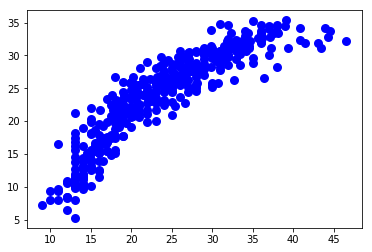

In [334]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
#plt.scatter(X, y, color='black')
plt.scatter(y, regr.predict(X), color='blue', linewidth=3)

In [335]:
regr.score(X,y)

0.8086876515237436

Coefficients: 
 [-0.47291364  0.06747333  0.00685944 -0.00636897  0.78900079]
Intercept: 
 -17.318350025221022


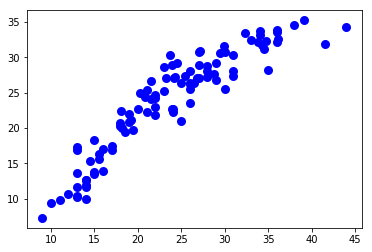

In [336]:
X = df[['cylinders','accel','displacement','weight', 'year']]
y = df["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X,y)
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)
#plt.scatter(y_test, regr.predict(X_test), color='blue', linewidth=3)


# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
#plt.scatter(X, y, color='black')
plt.scatter(y_test, regr.predict(X_test), color='blue', linewidth=3)
plt.show()

In [337]:
regr.score(X_test,y_test)

0.8564778743848056

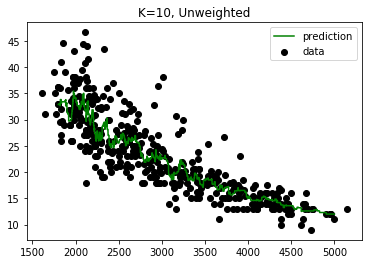

In [338]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.weight)
Y = df.mpg
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(1800, 5000, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

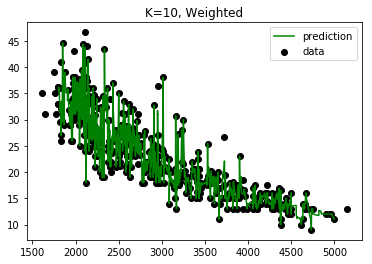

In [339]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')
X = pd.DataFrame(df.weight)
Y = df.mpg
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(1800, 5000, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [340]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.31 (+/- 1.20)
Weighted Accuracy: 0.08 (+/- 1.26)


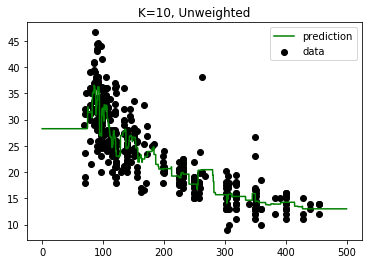

In [341]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.displacement)
Y = df.mpg
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 500, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [342]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.40 (+/- 0.94)
Weighted Accuracy: 0.32 (+/- 1.00)


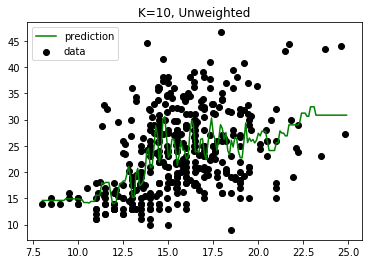

In [343]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.accel)
Y = df.mpg
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(8, 25, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [344]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.68 (+/- 1.87)
Weighted Accuracy: -0.97 (+/- 2.07)


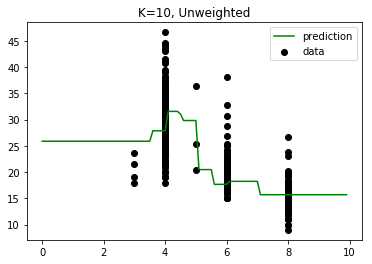

In [345]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.cylinders)
Y = df.mpg
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 10, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [346]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regr, X_train, y_train, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.78 (+/- 0.05)
Weighted Accuracy: -0.01 (+/- 0.97)


In [352]:
for i in range(3, 13, 2):
    
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    X = df[['accel', 'weight', 'displacement', 'cylinders', 'year']]
    y = df.mpg
    knn.fit(X, y)
    print(i)
    print(knn.score(X,y))
    
    
    #for i in range(3, 13, 2):
    
    #knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    #X = music[['duration', 'loudness']]
    #y = music.bpm
    #knn.fit(X, y)
    #print(i)
    #print(knn.score(X,y))



3
0.8368650233859776
5
0.7923782731984501
7
0.7704565436693237
9
0.7627866442399516
11
0.7501834305284119


In [348]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regr, X_train, y_train, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.78 (+/- 0.05)
Weighted Accuracy: -0.01 (+/- 0.97)


In [ ]:
## Suprisingly KNN and OLA regression are very similar, although a KNN with Neighbor =3 
## has a slightly better R2.  I used all of the features for the regression models.  Doing so gave the 
## best R2.